<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Generate-Targets" data-toc-modified-id="Generate-Targets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Generate Targets</a></span></li><li><span><a href="#2.-Simplest-Models" data-toc-modified-id="2.-Simplest-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. Simplest Models</a></span><ul class="toc-item"><li><span><a href="#All-Negative-Model" data-toc-modified-id="All-Negative-Model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All Negative Model</a></span><ul class="toc-item"><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#2.1.2-Accuracy" data-toc-modified-id="2.1.2-Accuracy-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>2.1.2 Accuracy</a></span></li><li><span><a href="#2.1.2-Precision" data-toc-modified-id="2.1.2-Precision-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>2.1.2 Precision</a></span></li><li><span><a href="#2.1.3-Recall" data-toc-modified-id="2.1.3-Recall-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>2.1.3 Recall</a></span></li><li><span><a href="#2.1.4-F1-Score" data-toc-modified-id="2.1.4-F1-Score-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>2.1.4 F1 Score</a></span></li><li><span><a href="#2.1.5-Classification-Report" data-toc-modified-id="2.1.5-Classification-Report-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>2.1.5 Classification Report</a></span></li><li><span><a href="#2.1.6-Confusion-Matrix" data-toc-modified-id="2.1.6-Confusion-Matrix-2.1.7"><span class="toc-item-num">2.1.7&nbsp;&nbsp;</span>2.1.6 Confusion Matrix</a></span></li></ul></li><li><span><a href="#2.2-All-Positive-Model" data-toc-modified-id="2.2-All-Positive-Model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2.2 All Positive Model</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Model-Building" data-toc-modified-id="2.2.1-Model-Building-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>2.2.1 Model Building</a></span></li><li><span><a href="#2.2.2-Scores-and-confusion-matrices" data-toc-modified-id="2.2.2-Scores-and-confusion-matrices-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>2.2.2 Scores and confusion matrices</a></span></li></ul></li></ul></li></ul></div>

From this notebook, we are going to build classification models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('sales.csv')
df.isnull().sum()

cost             981
price             11
weight             4
purchase_date      1
product_type       1
product_level      1
maker            824
ingredient       256
height             0
width              4
depth              4
dtype: int64

In [3]:
df.dropna(subset=['price'], inplace=True)
df.index = range(len(df))

In [4]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year
train_raw = df[df.year < 2015]
train_raw.index = range(len(train_raw))
test_raw = df[df.year >= 2015]
test_raw.index = range(len(test_raw))

In [5]:
df.isnull().sum()

cost             975
price              0
weight             3
purchase_date      0
product_type       0
product_level      0
maker            821
ingredient       254
height             0
width              3
depth              3
year               0
dtype: int64

# Generate Targets

<font color='red'>Assignment:</font> We define a categorical target **luxury**. If **price** is higher than 500k dollars, we say this item is a **luxury**, and use integer 1 to mark it as positive. Otherwise, we use 0 to mark it as negative. Get the target Series for training and testing data sets (**y_train** and **y_test**), respectively.

In [38]:
train_raw.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000
4,$59k,"$60,320",2 Ton 930 Kg,Aug 19 2011,H,super advanced,M14124,"IN732067,IN732068,IN732069,IN732070,IN732071,I...",2.71 meters,96 cm,25 cm,2011


In [7]:
#target = df.price.map(lambda x: float(x.strip('$').replace(',','')))

In [8]:
def price2target(x):
    if type(x) == str:
        x = float(x.strip('$').replace(',',''))
    
    if x > 500000.0:
        return 1
    return 0

In [9]:
y_train = train_raw.price.map(price2target)
y_test =  test_raw.price.map(price2target)

In [10]:
#sum(y_train == 1)

In [11]:
#sum(y_test == 1)

<font color='red'>Assignment:</font> Visualize the comparison between the numbers of positive and negative data points. **Hint:** You could use either bar chart or pie chart.

Text(0, 0.5, 'Data points')

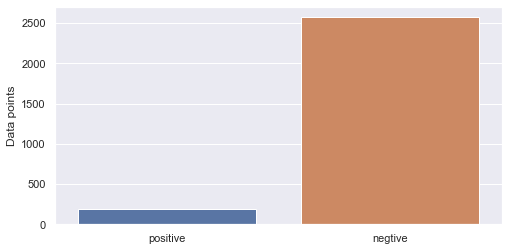

In [12]:
kind = ['positive','negtive']
count = [sum(y_train ==1),sum(y_train==0)]
plt.figure(figsize=(8,4))
sns.barplot(kind,count)
plt.ylabel('Data points')

<font color='red'>Question:</font> What is the definition of base rate?

https://en.wikipedia.org/wiki/Base_rate

In probability and statistics, the base rate (also known as prior probabilities) is the class of probabilities unconditional on "featural evidence" (likelihoods). For example, if it were the case that 1% of the public were medical professionals, and 99% of the public were not medical professionals, then the base rate of medical professionals is simply 1%. The normative method for integrating base rates and featural evidence is given by Bayes' rule.    

<font color='red'>Question:</font> What is the base rate in this case?

In train set, base rate = 

In [32]:
base_rate = sum(y_train == 1)/len(y_train)
base_rate

0.06673920928545521

# 2. Simplest Models

In [14]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth,year
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm,2008
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm,1997
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm,2001
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm,2016
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm,2000


In [15]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

class rf_Transformer():
    
    def fit(self,X,y=None):
        X=X.reset_index(drop=True)
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['depth'] = X.depth.map(self.depth2num)
        df['width'] = X.width.map(self.width2num)
        df['height'] = X.height.map(self.height2num)
        df['weight'] = X.weight.map(self.weight2num)
        purchase_date = pd.to_datetime(X.purchase_date)
        #df['weekday']=purchase_date.dt.weekday
        #df['month']=purchase_date.dt.month
        df['product_level'] = X.product_level.map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        
        #self.product_type_dict = X.product_type.value_counts().to_dict() # frequency of each product
        self.product_type_frequency_dictionary = (X.product_type.value_counts()/X.product_type.value_counts().sum()).to_dict()
        
        #self.maker_dict = (X.maker.value_counts()/X.maker.value_counts().sum()).to_dict()
        #df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
       
        df['product_type'] = X.product_type.map(self.product_type_frequency_dictionary)
        
        df['ingredient_count'] = X.ingredient.map(self.split)  # number of ingredient
                                                   
                                                 
    def transform(self,X, y=None):
        X=X.reset_index(drop=True)
        df = pd.DataFrame()
        df['cost'] = X.cost.map(self.cost2num)
        df['depth'] = X.depth.map(self.depth2num)
        df['width'] = X.width.map(self.width2num)
        df['height'] = X.height.map(self.height2num)
        df['weight'] = X.weight.map(self.weight2num)
        purchase_date = pd.to_datetime(X.purchase_date)
        #df['weekday']=purchase_date.dt.weekday
        #df['month']=purchase_date.dt.month
        df['product_level'] = X['product_level'].map({'unrated':0, 'basic':1,
                                                      'intermediate':2,'advanced':3,'super advanced':4})
        df['product_type'] = X.product_type.map(self.product_type_frequency_dictionary)
        
        #df['maker'] = X.maker.map(self.maker_dict)  # frequency of each maker
        
        
        df['ingredient_count'] = X.ingredient.map(self.split)  # number of ingredient
        return self.fillna_rf(df)
    
    def fit_transform(self,X,y=None):
        self.fit(X,y)
        return self.transform(X,y)
    
    
    
    def split(self,x):
        if type(x) == str:
            x = x.split(',')
            return len(x)
        return 0
      
        
    def cost2num(self, x):
        if type(x) == str: 
            x = x.strip('$').strip('k')
            return float(x)*1000
        return x
    
        
    def price2num(self,x):
        if type(x) == str:
            x = x.strip('$').replace(',','')
            return float(x)
        return x
    
    def weight2num(self,x):
        if type(x) == str:
            x = x.strip('Kg')
            x_list = x.split('Ton')
            return float(x_list[0])*1000 + float(x_list[1])
        return x
    
    def height2num(self,x):
        if type(x) == str:
            x = x.strip('meters')
            return float(x)
        return x
        
    def width2num(self,x):
        if type(x) == str:
            x = x.strip('cm')
            return float(x)
        return x
    
    def depth2num(self,x):
        if type(x) == str:
            x = x.strip('cm')
            return float(x)
        return x
        
            
    
    def fillna_rf(self,data):
        column_name = data.columns
        sortindex = np.argsort(data.isnull().sum(axis=0)).values#np.argsort() return a list with sorted index
        data_ = data.rename(columns={x:y for x,y in zip(column_name,range(0,len(column_name)))})

        for i in sortindex:
            if data_.iloc[:,i].isnull().sum()!=0:
                #print('i=',i)

                # creat a new dataframe (features without selected feature(need to fill) + target) + new target(set selected feature as new target)
                df = data_
                fillc = df.iloc[:,i]#new target
                df = df.iloc[:,df.columns != i]#new dataframe

                #in new dataframe，use median to fill NaN 
                df_0 =SimpleImputer(missing_values=np.nan,strategy='median').fit_transform(df)

                #set train and test set
                Ytrain = fillc[fillc.notnull()]# Ytrain is selected feature(current target) with not null values 
                Ytest = fillc[fillc.isnull()]#Ytest is selected feature(current target) with null values
                Xtrain = df_0[Ytrain.index,:]# get index of not null values
                Xtest = df_0[Ytest.index,:]# get index of null values

                #using random forest to fillna
                rfc = RandomForestRegressor(n_estimators=15,random_state = 2022)
                rfc = rfc.fit(Xtrain, Ytrain)
                Ypredict = rfc.predict(Xtest)

                #reset the value in original dataframe with predicted value
                data_.loc[data_.iloc[:,i].isnull(),i] = Ypredict
        data = data_.rename(columns={y:x for x,y in zip(column_name,range(0,len(column_name)))})       
        return data              

In [16]:
rf_tf = rf_Transformer()

In [17]:
rf_tf.fit_transform(train_raw)

,cost,depth,width,height,weight,product_level,product_type,ingredient_count
0,333000.000000,26.0,97.0,2.76,3090.0,3,0.009431,2
1,171133.333333,26.0,98.0,2.67,3030.0,1,0.034095,5
2,270000.000000,24.0,93.0,3.00,3040.0,1,0.034095,3
3,97000.000000,26.0,101.0,2.47,2970.0,3,0.058034,3
4,59000.000000,25.0,96.0,2.71,2930.0,4,0.054044,6
...,...,...,...,...,...,...,...,...
2752,254000.000000,30.0,113.0,2.02,3040.0,2,0.151251,13
2753,91000.000000,26.0,99.0,2.52,2890.0,3,0.151251,8
2754,305533.333333,28.0,106.0,2.15,2830.0,2,0.023576,6
2755,44000.000000,26.0,100.0,2.52,2950.0,3,0.020675,1


## All Negative Model

### Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 0.

In [18]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="constant",constant = 0)

dummy_clf.fit(train_raw,y_train)


DummyClassifier(constant=0, strategy='constant')

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [('rf_tf ',rf_Transformer())
         ,('Rescale', StandardScaler())
         ,('dummy_clf', DummyClassifier(strategy="constant",constant = 0))]
allzeromodel= Pipeline(steps)

allzeromodel=allzeromodel.fit(train_raw,y_train)

In [20]:
y_train_pred = allzeromodel.predict(train_raw)
y_test_pred = allzeromodel.predict(test_raw)

In [21]:
len(train_raw)

2757

In [22]:
len(y_train_pred[y_train_pred == 0])

2757

In [23]:
len(y_test_pred[y_test_pred == 0])

429

### 2.1.2 Accuracy

<font color='red'>Assignment:</font> Calculate the training and testing **accuracy_score**s.

https://blog.csdn.net/hfutdog/article/details/88085878

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.9332607907145448

In [25]:
accuracy_score(y_test,y_test_pred)

0.8927738927738927

<font color='red'>Question:</font> How is accuracy score calculated?

Accuracy= n_correct / n_total

n_corredt: sample number of the sample with right classification

n_total: total sample size

<font color='red'>Question:</font> Are the accuracy scores good? Why is that? Is the model useful?

No. Sample is unbalanced dataset. The accuracy is high but it is useless.

<font color='red'>Question:</font> How is accuracy score related to base rate?

 accuracy score = 1 - base rate

In [31]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

    
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print(train_accuracy)
print(test_accuracy)

0.9332607907145448
0.8927738927738927


In [37]:
base_rate

0.06673920928545521

### 2.1.2 Precision

<font color='red'>Assignment:</font> Calculate the training and testing **precision_score**s.

In [35]:
from sklearn.metrics import precision_score
#help(precision_score)

In [27]:
precision_score(y_train, y_train_pred,average='binary')

0.0

In [28]:
precision_score(y_train, y_train_pred,average='micro') #Calculate metrics globally by counting the total true positives,false negatives and false positives.

0.9332607907145448

In [29]:
precision_score(y_train, y_train_pred,average='macro')#Calculate metrics for each label, and find their unweightedmean.  This does not take label imbalance into account.

0.4666303953572724

In [30]:
precision_score(y_train, y_train_pred,average='weighted')

0.8709757034851374

In [31]:
precision_score(y_test, y_test_pred, average='weighted')

0.7970452236186502

<font color='red'>Question:</font> How is **precision_score** calculated?

Compute the precision. The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

<font color='red'>Question:</font> If the **precision_score** for a model is 80%, what does it mean?


predicted positive sample/ positive sample

### 2.1.3 Recall

<font color='red'>Assignment:</font> Calculate the training and testing **recall_score**s.

In [32]:
from sklearn.metrics import recall_score

In [34]:
#help(recall_score)

In [34]:
recall_score(y_train, y_train_pred, average='micro')

0.9332607907145448

In [35]:
recall_score(y_train, y_train_pred, average='macro')

0.5

In [36]:
recall_score(y_train, y_train_pred, average='weighted')

0.9332607907145448

In [37]:
recall_score(y_test, y_test_pred, average='micro')

0.8927738927738927

In [38]:
recall_score(y_test, y_test_pred, average='macro')

0.5

In [39]:
recall_score(y_test, y_test_pred, average='weighted')

0.8927738927738927

<font color='red'>Question:</font> How is **recall_score** calculated?

https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.metrics.recall_score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

<font color='red'>Question:</font> If the **recall_score** for a model is 80%, what does it mean?

The ones with right prediction acounts 80% in all sample labeled as 1(true value).

### 2.1.4 F1 Score

<font color='red'>Assignment:</font> Calculate the training and testing **f1_score**s.

In [40]:
from sklearn.metrics import f1_score

In [41]:
f1_score(y_train, y_train_pred, average='macro')

0.48273921200750475

In [42]:
f1_score(y_test, y_test_pred, average='macro')

0.47167487684729065

<font color='red'>Question:</font> How is **f1_score** calculated?

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

F1 = 2 * (precision * recall) / (precision + recall)

<font color='red'>Question:</font> Why do we need **f1_score**?

https://towardsdatascience.com/the-f1-score-bec2bbc38aa6

Accuracy is a useful metric only when you have an equal distribution of classes on your classification. This means that if you have a use case in which you observe more data points of one class than of another, the accuracy is not a useful metric anymore.

Precision: the first part of the F1 score. Within everything that has been predicted as a positive, precision counts the percentage that is correct:
A not precise model may find a lot of the positives, but its selection method is noisy: it also wrongly detects many positives that aren’t actually positives.
A precise model is very “pure”: maybe it does not find all the positives, but the ones that the model does class as positive are very likely to be correct.

Recall: the second part of the F1 score
Within everything that actually is positive, how many did the model succeed to find:
A model with high recall succeeds well in finding all the positive cases in the data, even though they may also wrongly identify some negative cases as positive cases.
A model with low recall is not able to find all (or a large part) of the positive cases in the data.

### 2.1.5 Classification Report

<font color='red'>Assignment:</font> Use **classification_report** to get systematic idea about model performance.

In [43]:
from sklearn.metrics import classification_report

In [33]:
#help(classification_report)

In [45]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2573
           1       0.00      0.00      0.00       184

    accuracy                           0.93      2757
   macro avg       0.47      0.50      0.48      2757
weighted avg       0.87      0.93      0.90      2757



In [46]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       383
           1       0.00      0.00      0.00        46

    accuracy                           0.89       429
   macro avg       0.45      0.50      0.47       429
weighted avg       0.80      0.89      0.84       429



### 2.1.6 Confusion Matrix

<font color='red'>Assignment:</font> Get the **confusion_matrix** of the model.

In [47]:
from sklearn.metrics import confusion_matrix 

In [48]:
confusion_matrix(y_train, y_train_pred)

array([[2573,    0],
       [ 184,    0]])

In [49]:
confusion_matrix(y_test, y_test_pred)

array([[383,   0],
       [ 46,   0]])

<font color='red'>Question:</font> What does every element in the confusion matrix represent, respectively?

https://www.sciencedirect.com/topics/engineering/confusion-matrix

11: ture value:1, predected:1

10: true value:1, predicted:0

01: true value:1, predicted: 0

00: true value:0, predicted:0

       Predicted
 True  [11,     10],
       
    [ 01,   00]

<font color='red'>Question:</font> How can you calculate recall and precision with a confusion matrix?

precision = 11/(11+01)

recall = 11/(11+10)

F-measure = 2*(precision * recall)/((precision + recall)

## 2.2 All Positive Model

### 2.2.1 Model Building

<font color='red'>Assignment:</font> Build a model which always predicts 1.

In [50]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="constant",constant = 1)

dummy_clf.fit(train_raw,y_train)

from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [('rf_tf ',rf_Transformer())
         ,('Rescale', StandardScaler())
         ,('dummy_clf', DummyClassifier(strategy="constant",constant = 1))]
allzeromodel= Pipeline(steps)

allzeromodel=allzeromodel.fit(train_raw,y_train)

In [51]:
y_train_pred = allzeromodel.predict(train_raw)
y_test_pred = allzeromodel.predict(test_raw)

<font color='red'>Assignment:</font> Make predictions for both training and testing data.

### 2.2.2 Scores and confusion matrices

<font color='red'>Assignment:</font> Calculate the scores and confusion matrices of this model.

In [52]:
accuracy_score(y_train, y_train_pred)

0.06673920928545521

In [53]:
accuracy_score(y_test, y_test_pred)

0.10722610722610723

In [54]:
precision_score(y_train, y_train_pred, average='macro')

0.033369604642727604

In [55]:
precision_score(y_test, y_test_pred, average='macro')

0.053613053613053616

In [56]:
recall_score(y_train, y_train_pred, average='macro')

0.5

In [57]:
recall_score(y_test, y_test_pred, average='macro')

0.5

In [58]:
f1_score(y_train, y_train_pred, average='macro')

0.06256375382522951

In [59]:
f1_score(y_test, y_test_pred, average='macro')

0.09684210526315791

In [60]:
confusion_matrix(y_train, y_train_pred)

array([[   0, 2573],
       [   0,  184]])

In [61]:
confusion_matrix(y_test, y_test_pred)

array([[  0, 383],
       [  0,  46]])

In [62]:
recall_score(y_train, y_train_pred, pos_label=1, average='macro')

0.5

In [63]:
recall_score(y_train, y_train_pred, pos_label=1, average='weighted')

0.06673920928545521

In [64]:
print(classification_report(y_train, y_train_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2573
           1       0.07      1.00      0.13       184

    accuracy                           0.07      2757
   macro avg       0.03      0.50      0.06      2757
weighted avg       0.00      0.07      0.01      2757



In [66]:
print(classification_report(y_test, y_test_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       383
           1       0.11      1.00      0.19        46

    accuracy                           0.11       429
   macro avg       0.05      0.50      0.10       429
weighted avg       0.01      0.11      0.02       429



<font color='red'>Question:</font> What are the difference between all-positive and all-negative models?

This is an unblanced data set, in train set only 6.67% are positive sample, other 93.33% is negative sample. So all-negative model shows better metrics than all positive model.